In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Trying to replicate Sahai's behavior of solution not being better for y being constant

In [50]:
x = np.zeros((50,1000))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if(j >= 1):
            x[i,j] = np.random.normal(0,1,1)
        else:
            x[i,j] = i
            
y = np.zeros(50)
y += 3
print(y)

y_test = np.zeros(100)
y_test += 3
print(y)

x_test = np.zeros((50,1000))
for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        if(j >= 1):
            x_test[i,j] = np.random.normal(0,1,1)
        else:
            x_test[i,j] = i + 50

print(x_test)
        

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[[ 5.00000000e+01  8.14724949e-01 -1.69592327e+00 ...  5.42183006e-01
   1.70002043e-01  1.23323759e+00]
 [ 5.10000000e+01 -1.75133829e+00  1.08594406e-01 ...  2.82618893e-01
   6.22871646e-01  1.05995865e+00]
 [ 5.20000000e+01  1.32676487e+00  1.45269713e-01 ... -9.05338865e-01
   3.06965391e-01  3.80038480e-01]
 ...
 [ 9.70000000e+01  1.54713609e-01  5.10694306e-01 ... -1.73408250e+00
   7.80213710e-02 -1.43875121e-01]
 [ 9.80000000e+01  7.56163597e-01 -7.83990487e-01 ...  1.60098187e-01
   7.45251779e-01 -3.83418230e-01]
 [ 9.90000000e+01  8.72862650e-03 -6.78322127e-01 ... -1.73212448e+00
  -8.05193347e-01 -9.23877241e-01]]


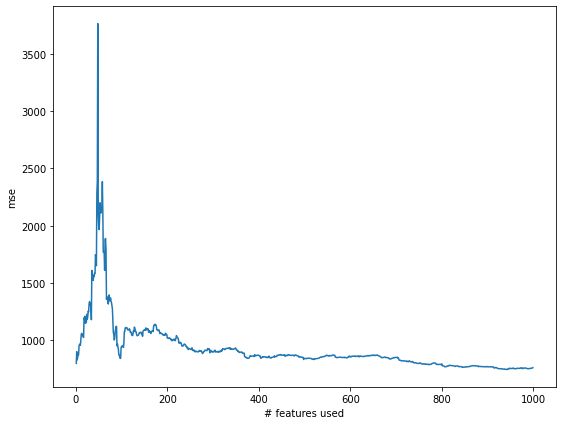

In [62]:
test_accuracy  = np.zeros(x.shape[1]-1)

for i in range(1,x.shape[1]):
    A = x[:,:i]
    A_test = x_test[:,:i]
#     A = np.transpose(A_t)
    Inv = np.linalg.pinv(A)
    beta = np.matmul(Inv,y)
    beta= beta.reshape(beta.size,1)
    pred = np.matmul(A_test,beta)
#     print("This is the mse using " + str(i) + " features such that one of them is signal and the others are all noise :")
    diff = y_test-pred
    sum_sq = np.sum(diff**2)
    mse = sum_sq/(y_test.size)
#     print(mse)
    test_accuracy[i-1] = mse
    
    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1]-1,x.shape[1]-1), y = (test_accuracy))
plt.xlabel("# features used")
plt.ylabel("mse")
plt.show()

In [64]:
# Using the fourier feature instead of the linear ones

<ipython-input-70-59c8e4741029>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  test_accuracy[i-1] = mse


[[-27.53022261 +0.j          -9.02237038-37.73978809j
   21.02348141+48.32565763j ...  22.73949917+33.8662417j
   21.02348141-48.32565763j  -9.02237038+37.73978809j]
 [-10.66552196 +0.j          -6.15520956-25.0243826j
    7.66457126-32.47722768j ...  25.53149169-16.97429356j
    7.66457126+32.47722768j  -6.15520956+25.0243826j ]
 [  5.89529748 +0.j           5.41966846 -7.85986952j
  -12.57898621-10.26484383j ...  -4.08895114-35.11141946j
  -12.57898621+10.26484383j   5.41966846 +7.85986952j]
 ...
 [ 64.40503096 +0.j          20.71728183-31.19607681j
   38.90120943+21.72238338j ...  50.91017503 -7.0074485j
   38.90120943-21.72238338j  20.71728183+31.19607681j]
 [-37.47817313 +0.j          30.69670889+29.15001705j
   47.21165058-12.87190751j ...  69.06362699+16.43831874j
   47.21165058+12.87190751j  30.69670889-29.15001705j]
 [ 45.66394458 +0.j          15.84403777-27.15838261j
  -15.61923556-13.97298521j ...  35.80502925+12.24481714j
  -15.61923556+13.97298521j  15.84403777+27.1583826

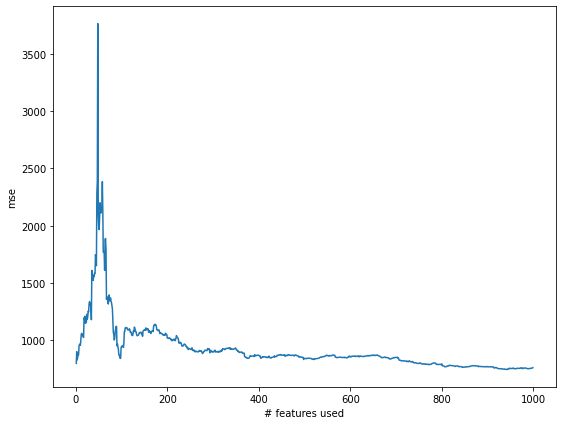

In [70]:
for i in range(1,x.shape[1]):
    A_fft = np.fft.fft(x[:,:i])
    A_fft_test = np.fft.fft(x_test[:,:i])
    Inv = np.linalg.pinv(A_fft)
    beta = np.matmul(Inv,y)
    beta= beta.reshape(beta.size,1)
#     print("This is beta: " +str(beta))
    pred = np.matmul(A_fft_test,beta)
    diff = y_test-pred
    sum_sq = np.sum(diff**2)
    mse = sum_sq/(y_test.size)
    test_accuracy[i-1] = mse
    

print(A_fft)
    
# print(beta)
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1]-1,x.shape[1]-1), y = (test_accuracy))
plt.xlabel("# features used")
plt.ylabel("mse")
plt.show()